Exercise 1: Exploratory Analysis on Real-World Data using Pandas and Matplotlib 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Reading the required csv files using pandas functionality
data_frame = pd.read_csv('Downloads/train.csv')
df_store = pd.read_csv('Downloads/store.csv')
print(df_store)


      Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0        

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


PART A

Find the store that has the maximum sale recorded. Print the store id, date and the sales on that day

In [2]:
column = data_frame["Sales"] #store the column Sales
max_index = column.idxmax()  #Finding the index of the maximum value
selected = data_frame.loc[[max_index]]  # Finding the row with that maximum index
print("Store with maximum sales:\n",selected[['Store','Date','Sales']])

Store with maximum sales:
        Store        Date  Sales
44393    909  2015-06-22  41551


Find the store(s) that has/ve the least possible and maximum possible competition distance(s).

In [3]:
column2 = df_store["CompetitionDistance"].idxmax() #Finding the row indices of the maximum and minimum competitiondistance value using idxmax and idxmin
sel2=df_store.iloc[column2]
column3 = df_store["CompetitionDistance"].idxmin()
sel3 = df_store.iloc[column3] 
print("Store with maximum competition distance:\n",sel2['Store'])
print("Store with minimum competition distance:\n",sel3['Store'])

Store with maximum competition distance:
 453
Store with minimum competition distance:
 516


What has been the maximum timeline a store has ran a "Promo" for? Which store was that, and what
dates did the promotion covered?

In [4]:
#Find cumsum of nopromo , correct answer - 5 consecutive days

#Sorting the rows in ascending order to get the earliest promo start year and week
print(df_store.sort_values(by=["Promo2SinceYear", "Promo2SinceWeek"],ascending=[True,True])[["Promo2SinceYear", "Promo2SinceWeek"]])


      Promo2SinceYear  Promo2SinceWeek
157            2009.0             31.0
276            2009.0             31.0
369            2009.0             31.0
611            2009.0             31.0
636            2009.0             31.0
...               ...              ...
1107              NaN              NaN
1109              NaN              NaN
1111              NaN              NaN
1112              NaN              NaN
1113              NaN              NaN

[1115 rows x 2 columns]


In [5]:
#min_year = df_store["Promo2SinceYear"].min()
#min_week = df_store["Promo2SinceWeek"].min()
#print(min_year)
#print(min_week)

#Find stores which runs the promo from the min year and min week 
col4 = df_store[(df_store["Promo2SinceYear"]==2009) & (df_store["Promo2SinceWeek"]==31)]

#select = df_store.loc[[col4]]
print("Store with the maximum timeline for running promo:\n",col4[['Store','Promo2SinceWeek','Promo2SinceYear','PromoInterval']])

Store with the maximum timeline for running promo:
      Store  Promo2SinceWeek  Promo2SinceYear    PromoInterval
157    158             31.0           2009.0  Feb,May,Aug,Nov
276    277             31.0           2009.0  Feb,May,Aug,Nov
369    370             31.0           2009.0  Jan,Apr,Jul,Oct
611    612             31.0           2009.0  Jan,Apr,Jul,Oct
636    637             31.0           2009.0  Feb,May,Aug,Nov
807    808             31.0           2009.0  Feb,May,Aug,Nov
959    960             31.0           2009.0  Feb,May,Aug,Nov


What is the difference in the mean of sales (across all stores) when offering a Promo and not?

In [6]:
#finding mean of sales when promo is running and not
x = data_frame.groupby('Promo', as_index=False)['Sales'].mean() 
print(x) #
xmin = x[['Sales']].min() 
xmax = x[['Sales']].max()
val = xmax-xmin #finding difference
print("Difference in mean of sales depending on promo :",val[0])


   Promo        Sales
0      0  4406.050805
1      1  7991.152046
Difference in mean of sales depending on promo : 3585.1012408091174


Are there any anomalies in the data as in where the store was "Open" but had no sales recorded? or
vice versa?

In [7]:
x = data_frame[(data_frame['Open']==0) & (data_frame['Sales'] != 0)]
print("Anomaly data when store was closed but sales happened: ",len(x))

y = data_frame[(data_frame['Open']==1) & (data_frame['Sales'] == 0)]
print("Anomaly data: when sales was zero but store was open cases: ",len(y),"\n")
data_frame[(data_frame['Open']==1) & (data_frame['Sales'] == 0)]


Anomaly data when store was closed but sales happened:  0
Anomaly data: when sales was zero but store was open cases:  54 



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
86825,971,5,2015-05-15,0,0,1,0,0,1
142278,674,4,2015-03-26,0,0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,0
322053,708,3,2014-10-01,0,0,1,1,0,0
330176,357,1,2014-09-22,0,0,1,0,0,0
340348,227,4,2014-09-11,0,0,1,0,0,0
340860,835,4,2014-09-11,0,0,1,0,0,0
341795,835,3,2014-09-10,0,0,1,0,0,0
346232,548,5,2014-09-05,0,0,1,1,0,1
346734,28,4,2014-09-04,0,0,1,1,0,0


Which store type (’a’,’b’ etc.) has had the most sales?

In [8]:

x = df_store[['Store','StoreType']]
df_2 = pd.merge(data_frame, x, on=['Store'], how='left')  #merging store and train dataframes
print(df_2)

y = df_2.groupby('StoreType', as_index=False)['Sales'].sum() # find sum of sales by store type




         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType  
0                  0              1         c  
1                  0              1    

In [9]:
print(y)

  StoreType       Sales
0         a  3165334859
1         b   159231395
2         c   783221426
3         d  1765392943


In [10]:
m = y[['Sales']].idxmax()
k = y.loc[m]
#print(k)
print("Maximum sales are by stores of type:\n",k[['StoreType','Sales']])




Maximum sales are by stores of type:
   StoreType       Sales
0         a  3165334859


Plotting - Part B

On a monthly basis how do the mean of sales vary (across all stores)? plot these sale

Month
1     5465.395529
2     5645.253150
3     5784.578871
4     5738.866916
5     5489.639973
6     5760.964375
7     6064.915711
8     5693.016554
9     5570.246033
10    5537.037419
11    6008.111821
12    6826.611377
Name: Sales, dtype: float64
12


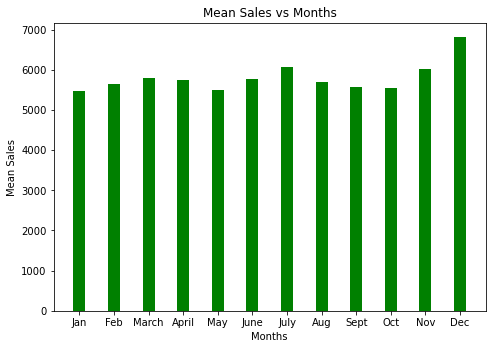

In [11]:
data_frame["Month"] = pd.to_datetime(data_frame['Date']).dt.month # Adding a month column after extracting month from date
y = data_frame.groupby("Month")["Sales"].mean() # Finding mean wrt month
print(y)

#Plotting the values in a bar graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ind = np.arange(12)
ax.set_ylabel('Mean Sales')
ax.set_xlabel('Months')
ax.set_title('Mean Sales vs Months')
print(len(y.index))
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12]) # values
ax.set_xticklabels(['Jan', 'Feb', 'March', 'April', 'May','June','July','Aug','Sept','Oct','Nov','Dec']) # labels

ax.bar(y.index,y.values,color='g',width= 0.35)
plt.show()

On a daily basis how do the mean of sales vary (across all stores)? again, plot these sales.

Day
0    7809.044510
1    7005.244467
2    6555.884138
3    6247.575913
4    6723.274305
5    5847.562599
6     204.183189
Name: Sales, dtype: float64
7


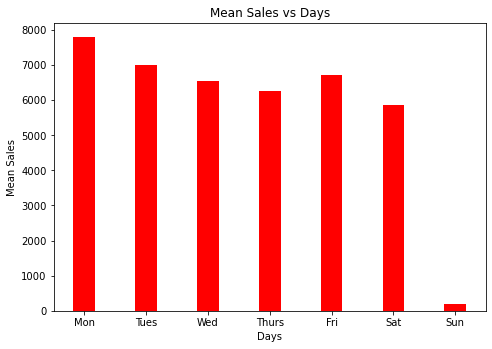

In [12]:
#finding day values from the date
data_frame["Day"] = pd.to_datetime(data_frame['Date']).dt.weekday 
y = data_frame.groupby("Day")["Sales"].mean() # Finding  mean wrt to each day
print(y)

#Plotting the values on a bar graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ind = np.arange(7)
ax.set_ylabel('Mean Sales')
ax.set_xlabel('Days')
ax.set_title('Mean Sales vs Days')
print(len(y.index))
ax.set_xticks([6,0,1,2,3,4,5]) # values
ax.set_xticklabels(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs','Fri','Sat']) # labels

ax.bar(y.index,y.values,color='r',width= 0.35)
plt.show()

For the first store id, plot it’s cumulative sales for the first year

         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
610235       1          2  2013-12-31   2362        298     1      0   
611350       1          1  2013-12-30   7193        796     1      0   
612465       1          7  2013-12-29      0          0     0      0   
613580       1          6  2013-12-28   5659        716     1      0   
614695       1          5  2013-12-27   6110        737     1      0   
...        ...        ...         ...    ...        ...   ...    ...   
1011635      1          6  2013-01-05   4997        635     1      0   
1012750      1          5  2013-01-04   4486        619     1      0   
1013865      1          4  2013-01-03   4327        578     1      0   
1014980      1          3  2013-01-02   5530        668     1      0   
1016095      1          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  Month  Day  
610235             0              1     12    1  
611350             0              1

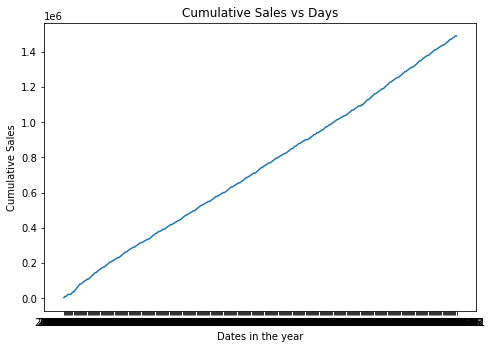

In [13]:
# Finding the rows of sales for the first year for first store
filtered = data_frame.loc[(data_frame['Date'] >= '2013-01-01') & (data_frame['Date'] < '2014-01-01') & (data_frame['Store'] ==1)] 
                     

print(filtered)

Y=filtered["Sales"].cumsum() #Calculating the cumulative sales
print(Y)

#Plotting the sales
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ind = np.arange(7)
ax.set_ylabel('Cumulative Sales')
ax.set_xlabel('Dates in the year')
ax.set_title('Cumulative Sales vs Days')
ax.plot(filtered["Date"],Y)
plt.show()

Plot and comment on the following relationships:
– customers(x-axis) vs. sales(y-axis)
– competitiondistance(x-axis) vs. sales(y-axis)

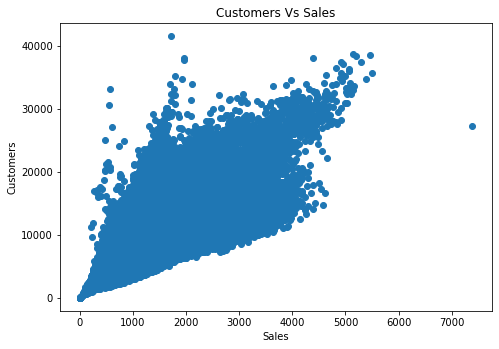

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Customers')
ax.set_xlabel('Sales')
ax.set_title('Customers Vs Sales')
ax.scatter(data_frame["Customers"],data_frame["Sales"]) #Scatter plot due to numerous points
plt.show()

It is observed that as customers increses the sales also increases!!!. They have a positive relation

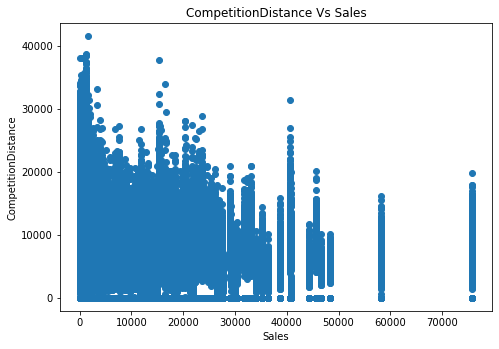

In [15]:
x = data_frame[['Sales','Store']]
df_2 = pd.merge(df_store, x, on=['Store'], how='left') 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('CompetitionDistance')
ax.set_xlabel('Sales')
ax.set_title('CompetitionDistance Vs Sales')
ax.scatter(df_2["CompetitionDistance"],df_2["Sales"]) #Scatter plot
plt.show()

We observe that the sales are clustered near the less competition distance area. Hence more sales are occuring when competition distance is less.

Plot an array of Pearson correlations between all features. Remember to do the merge operation
between the dataframes store and train.

In [16]:
corr_df = pd.merge(data_frame,df_store,on=["Store"],how = 'right') #merging data frames
print(corr_df)
print("\nPearson correlation btw all features:\n")
corr_df.corr(method='pearson', min_periods=1) #formula

         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            1          4  2015-07-30   5020        546     1      1   
2            1          3  2015-07-29   4782        523     1      1   
3            1          2  2015-07-28   5011        560     1      1   
4            1          1  2015-07-27   6102        612     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1115          6  2013-01-05   4771        339     1      0   
1017205   1115          5  2013-01-04   4540        326     1      0   
1017206   1115          4  2013-01-03   4297        300     1      0   
1017207   1115          3  2013-01-02   3697        305     1      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  Month  Day StoreType Assortment  \
0                  0              1      7    4         c      

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Month,Day,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,0.001467,-0.000008,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.005362,1.000000,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,0.048768,-0.462125,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,0.038179,-0.386445,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,-0.000681,-0.528963,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,-0.011747,-0.392925,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,0.103282,-0.205388,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
Month,0.001467,-0.005362,0.048768,0.038179,-0.000681,-0.011747,0.103282,1.000000,-0.005362,0.003578,-0.000624,0.003916,-0.025323,-0.026127,-0.007328
Day,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.005362,1.000000,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,0.003578,-0.000025,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695


For the first 10 stores (id’ed) draw boxplots of their sales

In [17]:
#x = data_frame.groupby("Store")["Sales"].median() # Finding meadian of sales by store
#x.head(10)

         Sales  Store
0         5263      1
1         6064      2
2         8314      3
3        13995      4
4         4822      5
...        ...    ...
1016100      0      6
1016101      0      7
1016102      0      8
1016103      0      9
1016104      0     10

[9420 rows x 2 columns]


<AxesSubplot:title={'center':'Sales'}, xlabel='Store'>

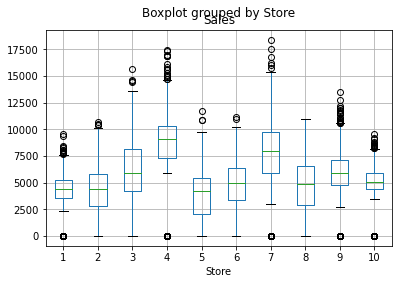

In [18]:

#finding the required rows and columns from the stores having id less than 11
box_df = data_frame.loc[(data_frame['Store'] <= 10)][["Sales","Store"]]
print(box_df)
box_df.boxplot(column = 'Sales', by = 'Store') # box plot

#we can find outliers easily by plotting as box plots



From the above box plot we find that the 4th store has the highest median sale(the green line) .

References

https://thispointer.com/pandas-find-maximum-values-position-in-columns-or-rows-of-a-dataframe/
https://stackoverflow.com/questions/22546425/how-to-implement-a-boolean-search-with-multiple-columns-in-pandas
https://stackoverflow.com/questions/13890673/pandas-generate-and-plot-average
https://pandas.pydata.org/
https://matplotlib.org/
https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr